# SciKit-Learn comes with certain datasets, such as the Iris dataset. Read about this dataset https://archive.ics.uci.edu/dataset/53/iris, and import it into your notebook.

In [ ]:
from sklearn.datasets import load_iris


iris = load_iris()  # load the dataset
X = iris.data       # extract feature vectors
y = iris.target     # extract labels

# Before getting into classification, it is good to get an idea of the data you are working with.

# Explore the Iris dataset. For example, find out:

    How many features the dataset contains, and what each feature represents

    How many labels/categories there are, and what they represent

    How many observations there are in the dataset

# Create visualizations of the dataset, such as scatter plots of the feature vectors, colored by its labels. You can use matplotlib for this.

In [ ]:
# Explore the dataset
print("Feature names:", iris.feature_names)
print("\nTarget names:", iris.target_names)
print("\nFirst 5 rows of X:\n", X[:5])
print("\nFirst 5 rows of y:\n", y[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: ['setosa' 'versicolor' 'virginica']

First 5 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 rows of y:
 [0 0 0 0 0]


 # You can use matplotlib as follows to create a scatterplot of the dataset.

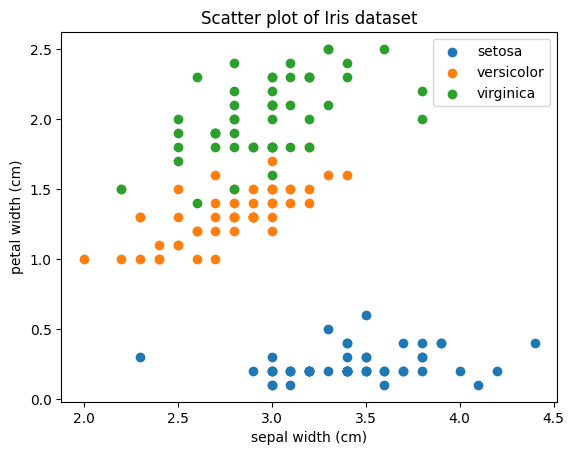

In [ ]:
# Create visualizations of the dataset
import matplotlib.pyplot as plt


for i, label in enumerate(iris.target_names):
  plt.scatter(X[y == i, 1], X[y == i, 3], label=label)


plt.legend()
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.title("Scatter plot of Iris dataset")
plt.show()

# Split the dataset

# We now need to split the dataset into a training and test set in order to train our classifier. You can do this with the train_test_split method from scikit-learn. Read its reference page to learn more about the method.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SKLearn comes with implementations of the kNN classifier. Read about the KNeighborsClassifier in scikit-learn’s documentation.

# Import SKLearn's implementation into your notebook, and use it to train a kNN classifier with  k=3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Train a k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=75)

# Evaluate the classifier:

# Now, let's evaluate the performance of the classifier.

# First, you'll have to use the classifier to make predictions.

# Then, you can use those predictions to determine accuracy, precision, recall, and the confusion matrix. You may use SKLearn's pre-built tools to compute these performance metrics. You can find these in the documentation, under sklearn.metrics.

# Use your trained classifier to predict the labels of samples in your test set.

In [ ]:
# Compute the predictions of your classifier
y_pred = knn.predict(X_test)

# Evaluate the performance of your classifier by computing its:

    Accuracy

    Precision

    Recall

# Display the confusion matrix as well.

# Interpret your results.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


# Evaluate the classifier
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy : 0.6842105263157895
Precision: 0.7950937950937952
Recall   : 0.7141414141414142
Confusion Matrix:
[[ 6  9  0]
 [ 0 10  1]
 [ 0  2 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.48      0.91      0.62        11
           2       0.91      0.83      0.87        12

    accuracy                           0.68        38
   macro avg       0.80      0.71      0.69        38
weighted avg       0.82      0.68      0.68        38



# Try changing the value of k (over a large range of values) in the kNN algorithm and observe the impact on the accuracy.  

# To do this, you can use numpy to work more easily with a wide range of values of k. It may also be helpful to plot the scores on accuracy, precision, and recall for different values of k.

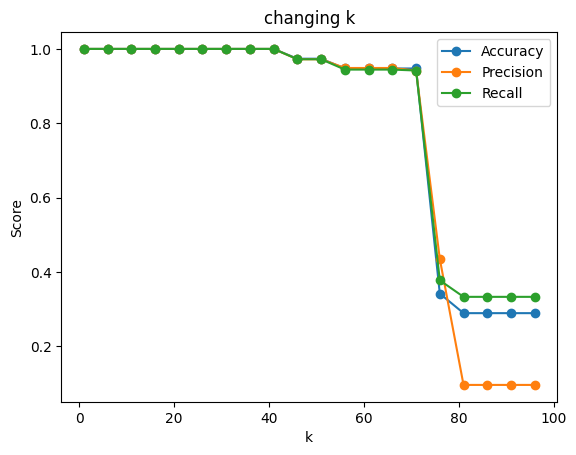

In [ ]:
import numpy as np


k_range = np.arange(1, 100, 5)
accuracy_list = np.zeros(len(k_range))
precision_list = np.zeros(len(k_range))
recall_list = np.zeros(len(k_range))


for i, k in enumerate(k_range):
    y_pred = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)


    accuracy_list[i] = accuracy_score(y_test, y_pred)
    precision_list[i] = precision_score(y_test, y_pred, average='macro', zero_division=0.0)
    recall_list[i] = recall_score(y_test, y_pred, average='macro')


plt.plot(k_range, accuracy_list, '-o', label='Accuracy')
plt.plot(k_range, precision_list, '-o', label='Precision')
plt.plot(k_range, recall_list, '-o', label='Recall')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('changing k')
plt.legend()
plt.show()

# Increasing values of k correspond to lower accuracy, precision, and recall.